In [58]:
from IPython.display import HTML
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import display, IFrame, Math, Latex
import scipy.stats as stats
import webbrowser
import warnings
warnings.filterwarnings("ignore")

In [3]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
#https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

## Descriptive Statistics

Describe data with numerical calculations or plots. Most common descriptive statistics used in interviews are:
- Measures of centrality
- Measures of variability

Interviewers will likely provide skewed distributions to assess your comfortability of centrality metrics.

***Measures of centrality***
- Mean (Expected Value)
- Median
- Mode

***Measures of variability (Dispursion or Spread)***
- Variance 
- Standard Deviation 
- Range 


**Variance**:
    $$S^2 = \frac{\sum (x-\bar{x})^2}    {n-1}$$
    
**Standard Deviation**:
    $$S = \sqrt{\frac{\sum (x-\bar{x})^2}    {n-1}}$$

**Modality**:

Number of peaks in distribution

**Skewness**:

Measure of symmetry of distribution

### Exercise(s):

**Mean or median**

As data scientists, we often look to describe data as concisely as possible. This brings us to the two most common measures of centrality: mean and median. In this exercise, you'll examine a couple different scenarios and decide which metric is optimal for effectively describing the data.

More concretely, you'll be exploring Australian weather data containing features related to temperature and wind speeds. This dataset has already been imported as weather and both the matplotlib and pandas packages have been imported as plt and pd for you to use the rest of the chapter as well.
- Plot the distribution of the Temp3pm column using the hist() function; is the data skewed at all?


In [3]:
weather=pd.read_csv('weatherAUS.csv')[:100]

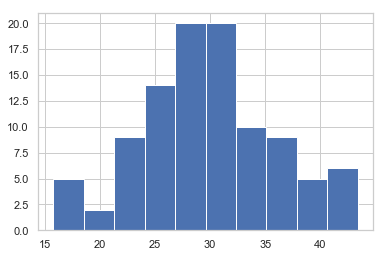

Mean: 29.78800000000001
Median: 29.55


In [4]:
# Visualize the distribution 
plt.hist(weather['Temp3pm'])
plt.show()

# Assign the mean to the variable and print the result
mean = weather['Temp3pm'].mean()
print('Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp3pm'].median()
print('Median:', median)

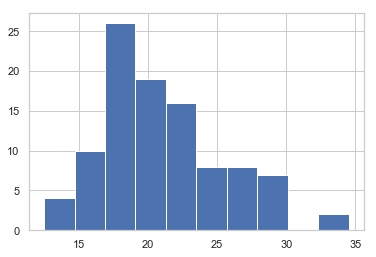

Mean: 20.972
Median: 20.65


In [5]:
# Visualize the distribution 
plt.hist(weather['Temp9am'])
plt.show()

# Assign the mean to the variable and print the result
mean = weather['Temp9am'].mean()
print('Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp9am'].median()
print('Median:', median)

**Standard deviation by hand**

In the video, we talked about measures of variability, and discussed standard deviation as the measure that is used most commonly. It's pretty important that you have a grasp on this concept, as interviewers will likely hit on it early on in the process through a coding assignment or something more conceptual.

Here, you'll simulate this experience by computing standard deviation by hand, meaning that you won't use any existing functions like std() to get your results.

In [6]:
# Create a sample list
import math
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = (1+2+3+4+5)/5

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = variance**2
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

4.0
1.4142135623730951


## Categorical data

Types of variables:
- Categorical
- Nominal
    - Order doesn't matter (ex. gender or eye color)
- Ordinal
    - Some sort of order (ex. stars in a movie review)

May need to relable values for data using label or one-hot encoding
    

### Exercise(s):

**Encoding techniques**

In the slides, we discussed two encoding techniques: label encoding and one-hot encoding. In practice, the technique that you use is determined by the situation at hand. That being said, you should have both of these at your disposal for your interview.

In this exercise, you'll practice implementing both of these techniques on the same dataset of laptop prices that you saw earlier, pre-loaded within the laptops variable.

In [100]:
laptops=pd.read_csv('laptops.csv',encoding = 'ISO-8859-1')[:100]

In [101]:
from sklearn import preprocessing

# Create the encoder and print our encoded new_vals
encoder = preprocessing.LabelEncoder()
new_vals = encoder.fit_transform(laptops['Company'])
print(new_vals)

[1 1 5 1 1 0 1 1 2 0 5 5 1 4 1 1 4 1 6 4 2 6 5 4 5 4 1 4 4 5 3 2 5 4 1 6 0
 4 5 5 2 4 2 0 4 1 6 2 4 2 6 0 5 5 0 4 5 2 7 2 4 4 6 2 5 2 5 5 6 2 8 4 4 7
 0 2 6 4 0 5 4 1 5 6 0 4 5 5 2 4 2 0 5 4 2 0 4 4 2 5]


In [102]:
# One-hot encode Company for laptops2
laptops2 = pd.get_dummies(data=laptops, columns=['Company'])
print(laptops2.head())

   Unnamed: 0      Product   TypeName  Inches  \
0           1  MacBook Pro  Ultrabook    13.3   
1           2  Macbook Air  Ultrabook    13.3   
2           3       250 G6   Notebook    15.6   
3           4  MacBook Pro  Ultrabook    15.4   
4           5  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS   
2            256GB SSD         Intel HD Graphics 620  No OS   
3 

**Exploring laptop prices**

We walked through an example in the video of surface-level data analysis of categorical variables. Here, you'll perform a similar task first-hand. Taken from the same pre-loaded laptops dataset, you'll work with three separate brands: Acer, Asus, and Toshiba.

You'll produce some initial information about the dataset, create a countplot of the companies, and analyze the relationship of each against the price in euros.

All of the usual packages have been imported for you. We've also gone ahead and imported the seaborn package as sns for you, which we'll use for visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
Unnamed: 0          100 non-null int64
Company             100 non-null object
Product             100 non-null object
TypeName            100 non-null object
Inches              100 non-null float64
ScreenResolution    100 non-null object
Cpu                 100 non-null object
Ram                 100 non-null object
Memory              100 non-null object
Gpu                 100 non-null object
OpSys               100 non-null object
Weight              100 non-null object
Price_euros         100 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 10.2+ KB


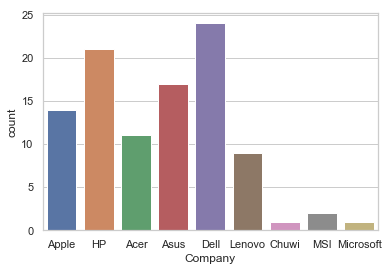

In [103]:
# Get some initial info about the data
laptops.info()

# Produce a countplot of companies
sns.countplot(laptops['Company'])
plt.show()

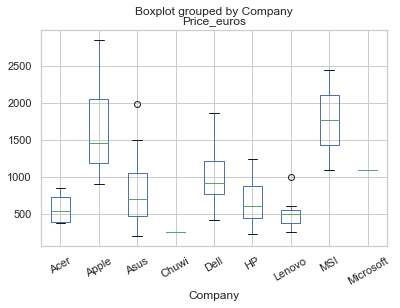

In [104]:
# Visualize the relationship with price
laptops.boxplot('Price_euros', 'Company', rot=30)
plt.show()

## Missing Data and Outliers

### Handling Missing Data
- Drop whole row
    - Could lose valuable information that could strengthen the model
- Input missing value
    - Takes more thought but allows to preserve some valuable information
    - Add a constant value
    - Replace with randomly selected record
    - Replace with Mean, Median, Mode
    - Some value estimated by another model
- Useful functions
    - isnull() : find missing values
    - dropna() : drop missing values
    - fillna() : imputation

### Dealing with Outliers
- Identify Outliers
    - Standard Deviations
        - Anything outside of 3 standard deviations
    - Interquartile Range (IQR)
        - Using Fencing and Box Plots
    - Z-scores

### Exercise(s):

**Handling null values**

Let's practice handling null values with our laptops dataset that we worked with previously. You will identify rows with null values, and then try out several techniques to address this problem.

Remember that the laptops data and the pandas package have been imported for you already.

In [113]:
laptops=pd.read_csv('laptops.csv',encoding = 'ISO-8859-1')
# Identify and print the the rows with null values
nulls = laptops[laptops.isnull().any(axis=1)]
print(nulls)

Empty DataFrame
Columns: [Unnamed: 0, Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros]
Index: []


In [114]:
# Impute constant value 0 and print the head
laptops.fillna(0, inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


In [115]:
# Impute median price and print the head
laptops.fillna(laptops['Price_euros'].median(), inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


In [116]:
# Drop each row with a null value and print the head
laptops.dropna(inplace=True)
print(laptops.head(3))

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  


**Identifying outliers**

Let's keep at it with our laptops dataset and tackle some outliers hiding away. In this exercise, we'll stick to the first technique we discussed in the slides using standard deviations to identify extreme values, since this method is more common in practice.

You'll compute the descriptive statistics and outlier boundaries, and then identify the rows with them before dropping them from the dataset. You'll be working primarily with the Price column here.

In [123]:
# Calculate the mean and std
mean, std = laptops['Price_euros'].mean(), laptops['Price_euros'].std()

# Compute and print the upper and lower threshold
cut_off = std * 3
lower, upper = mean-cut_off, mean+cut_off
print(lower, 'to', upper)

# Identify and print rows with outliers
outliers = laptops[(laptops['Price_euros'] > upper) | (laptops['Price_euros'] < lower)]
print(outliers)

# Drop the rows from the dataset
laptops = laptops[(laptops['Price_euros'] <= upper) | (laptops['Price_euros'] >= lower)]

-973.3401360432797 to 3220.7141191591663
      Unnamed: 0 Company             Product     TypeName  Inches  \
196          200   Razer           Blade Pro       Gaming    17.3   
238          243    Asus   ROG G703VI-E5062T       Gaming    17.3   
610          617  Lenovo        Thinkpad P51     Notebook    15.6   
723          731    Dell        Alienware 17       Gaming    17.3   
744          752  Lenovo       Thinkpad P51s  Workstation    15.6   
749          758      HP            Zbook 17  Workstation    17.3   
780          789    Dell        Alienware 17       Gaming    17.3   
830          839   Razer           Blade Pro       Gaming    17.3   
1066        1081    Asus          ROG G701VO       Gaming    17.3   
1081        1096  Lenovo  IdeaPad Y900-17ISK       Gaming    17.3   
1136        1151      HP            ZBook 17  Workstation    17.3   
1231        1249   Razer           Blade Pro       Gaming    14.0   

                         ScreenResolution                    

## Two or more variables

Assumptions:
- Random
- Independant
- Non-biased
- Real numbers

### Types of relationships:

**What is Expected value?**
- Mean of distribution

**What is Error?**

- Distance from observed value x from the unobservable ***true*** population mean

**What is variance?**
- Variance is a measure of how spread out the distribution is from its mean or expected value.

Population:

$$Var_{x} = \sum (x-\bar{x}))$$

**What is covariance?**
- [Covariance](https://en.wikipedia.org/wiki/Covariance) is the measure of a linear relationship between two random variables.
- Positive covariances arise when relatively large y tend to occur with relatively large values of x
- Negative covariances arise when relatively large values of y tend to occur with relatively small values of x
- Correlation coefficient is a rescaled & standardized covariance in order to maintain interpretability

Sample:
$$Cov_{x,y} = \frac{\sum (x-\bar{x})*(y-\bar{y}) }    {n-1}$$

OR

Population:
$$Cov_{x,y} = \sum (x-\bar{x})*(y-\bar{y})$$


**What is correlation?**
- [Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) describes the *strength* of relationship (association) between two variables.

$$\rho_{x,y} = \frac{\sum (x-\bar{x})*(y-\bar{y}) }    {\sum \sqrt{(x-\bar{x})^2}*\sqrt{(y-\bar{y})^2}}$$

OR

$$\rho_{x,y} = \frac{S_{xy}}    {\sqrt{S_{xx}}*\sqrt{S_{yy}}}$$

OR

Population:
$$\rho_{x,y} = \frac{Cov_{x,y}}    {\sqrt{Var_{x}}*\sqrt{Var_{y}}}$$


*A value of 1 means perfect correlation and a value of 0 means no (linear combination) relationship. Therefore, meaning a value of 1 means that a unit increase in y dictates an exact proportional change in x.*

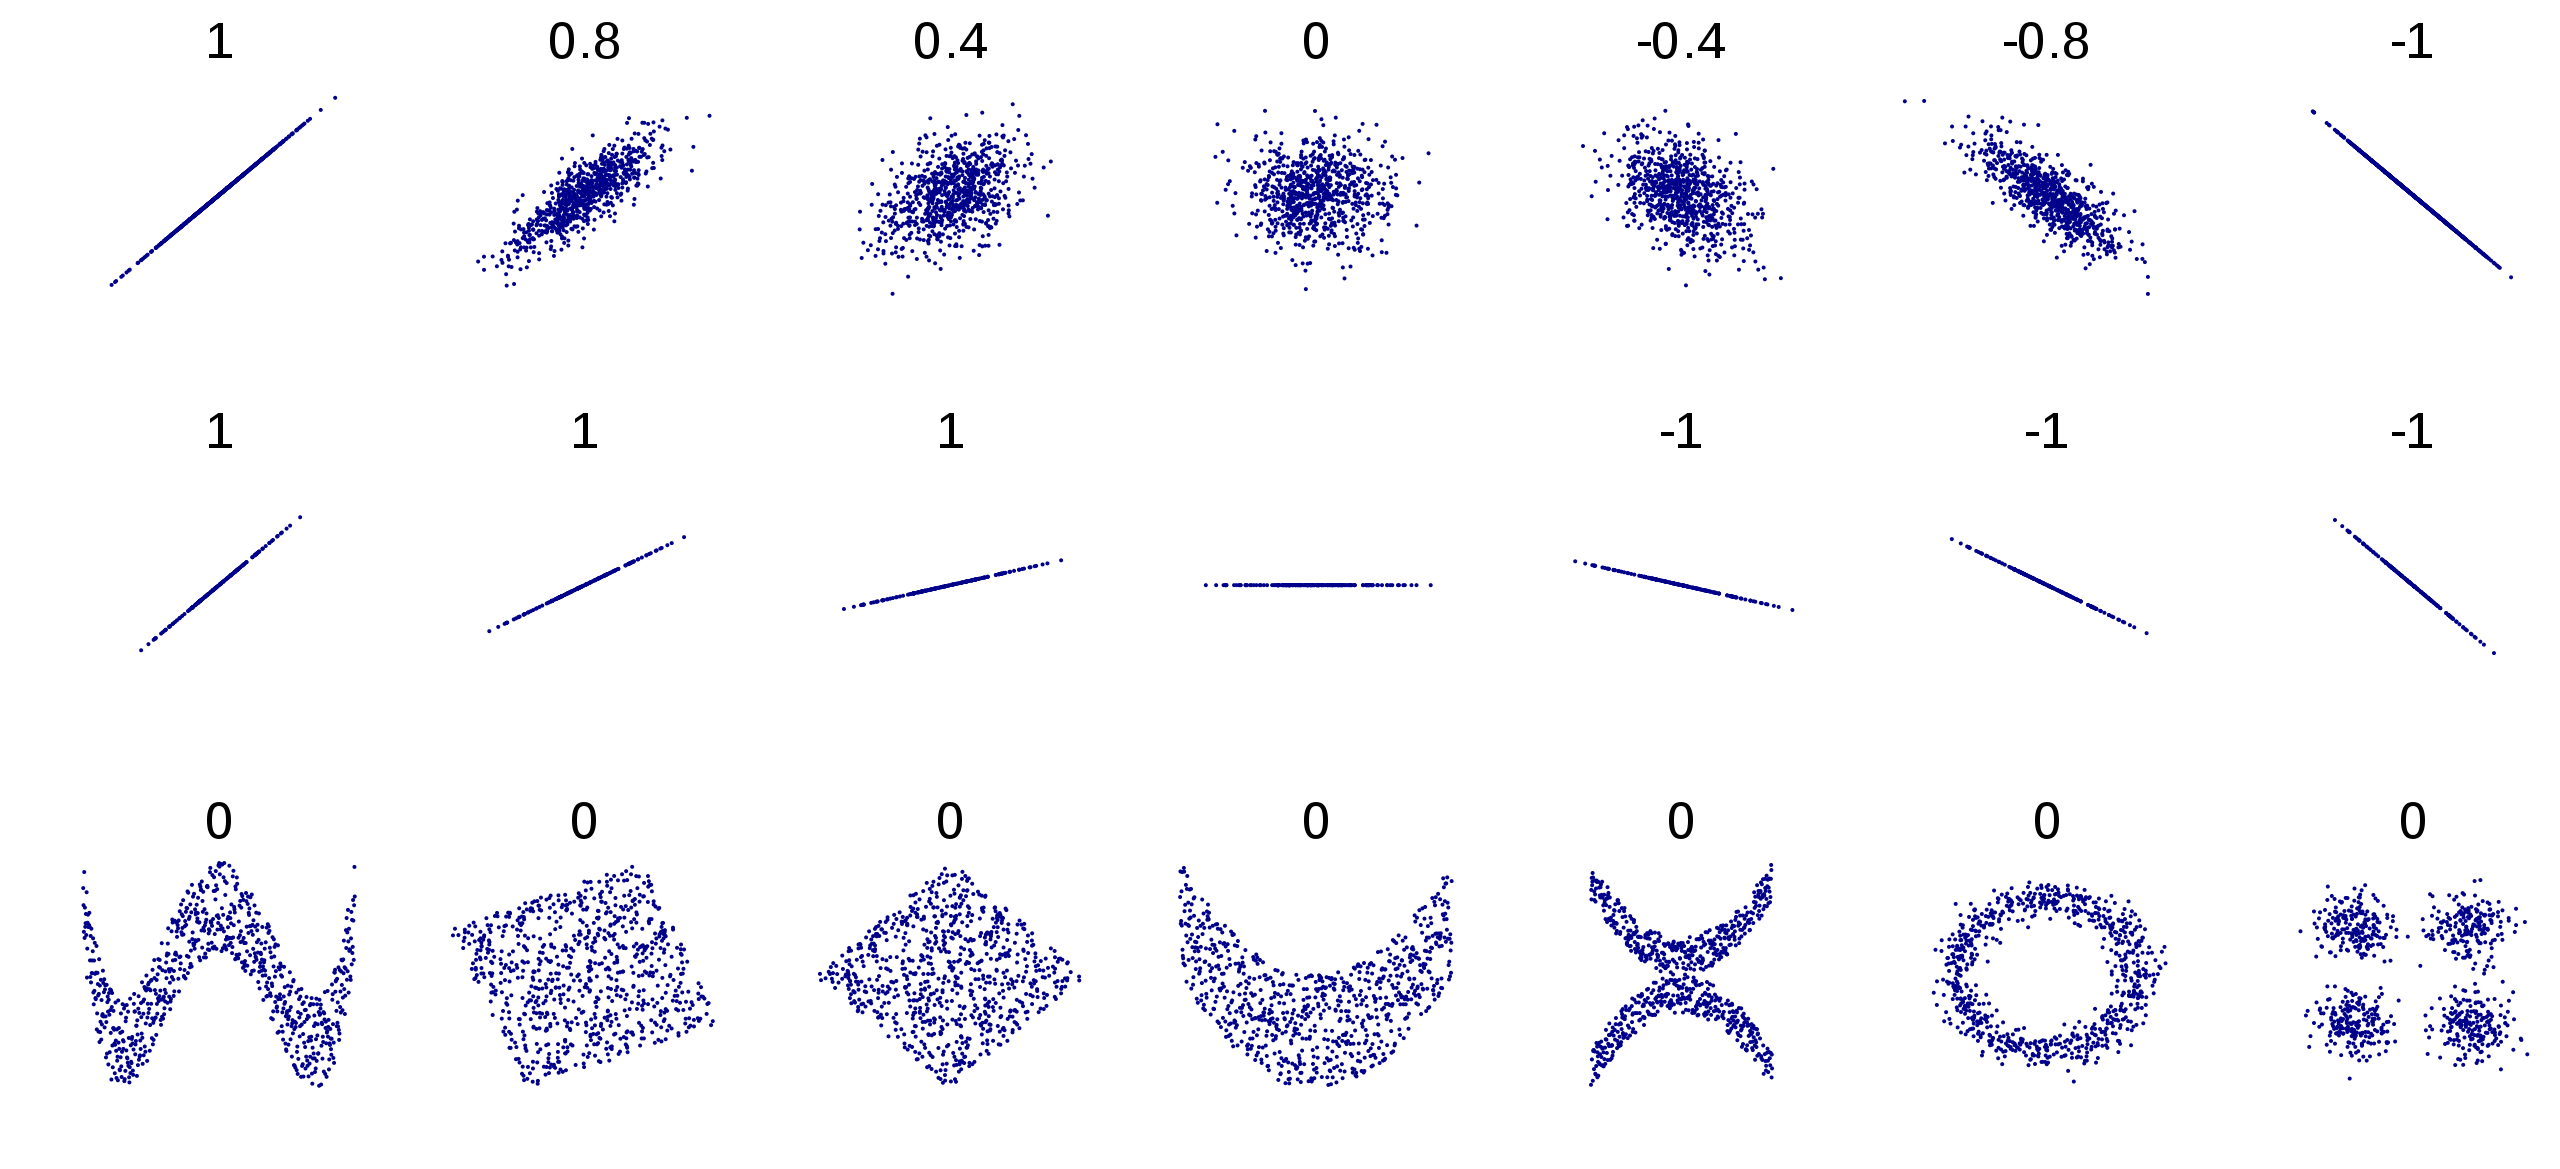

In [12]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png'
Image(url,width=500, height=500)

### Exercise(s):

**Types of relationships**

How do we effectively identify these relationships in practice? The first and often only step you need, is to visualize the data using a scatter plot. In this exercise, you'll examine a few different relationships, produce the scatter plot, and then consider what each plot tells us about the relationship.

You'll work with a few different features in the Australian weather dataset from before, imported as weather for you to use. For the sake of this exercise, make sure you pass features in the order they are given to you!

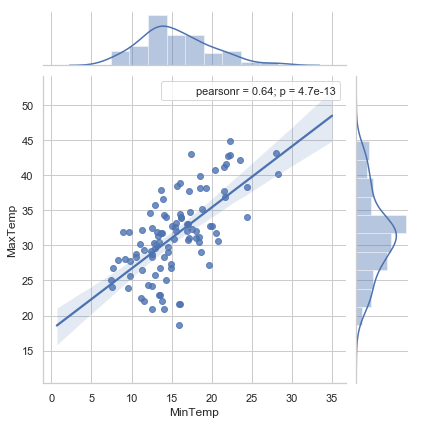

In [21]:
# Display a scatter plot and examine the relationship
sns.jointplot(weather.MinTemp, weather.MaxTemp,kind='reg').annotate(stats.pearsonr)
plt.show()

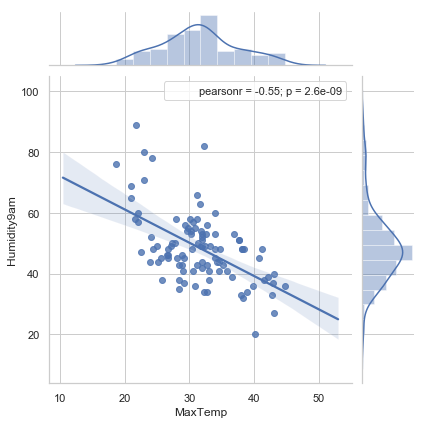

In [22]:
sns.jointplot(weather.MaxTemp, weather.Humidity9am,kind='reg').annotate(stats.pearsonr)

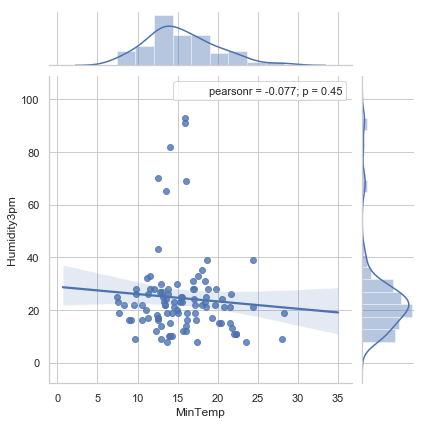

In [23]:
sns.jointplot(weather.MinTemp,weather.Humidity3pm,kind='reg').annotate(stats.pearsonr)

**Pearson correlation**

You know how to identify different relationships based on scatter plots, but let's take a more practical approach now and dive a bit deeper into one relationship. We'll stick to the same version of the weather dataset that we just used.

You'll analyze a seaborn pair plot of some features before drilling down for further analysis and coming to a conclusion about the correlation. This process should be something that you feel quite comfortable with.

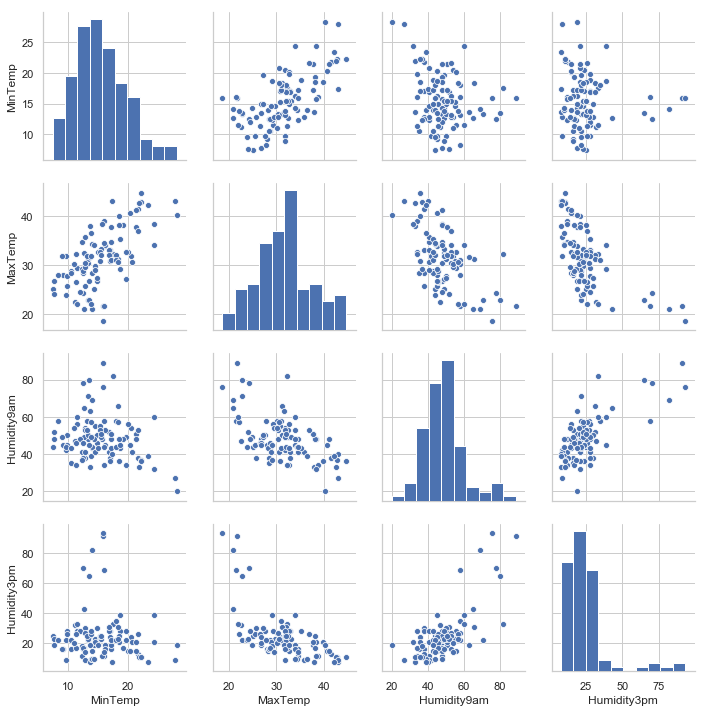

In [24]:
# Generate the pair plot for the weather dataset
sns.pairplot(weather[['MinTemp','MaxTemp','Humidity9am','Humidity3pm']])
plt.show()

In [25]:
# Compute and print the Pearson correlation
r = weather['Humidity9am'].corr(weather.Humidity3pm)
print(r)

0.6980757492729275


**Pearson correlation**

You know how to identify different relationships based on scatter plots, but let's take a more practical approach now and dive a bit deeper into one relationship. We'll stick to the same version of the weather dataset that we just used.

You'll analyze a seaborn pair plot of some features before drilling down for further analysis and coming to a conclusion about the correlation. This process should be something that you feel quite comfortable with.

In [26]:
# Compute and print the Pearson correlation
r = weather['Humidity9am'].corr(weather['Humidity3pm'])

# Calculate the r-squared value and print the result
r2 = r**2
print(r2)

0.4873097517229591


**Sensitivity to outliers**

When we are analyzing the relationship of more than one variable, correlation is a great start. But how does correlation hold up against some more interesting datasets? How well does it hold up against outliers?

In this exercise, you will plot and compute the correlation for a dataset with an outlier and then remove it and see what changes. In the end, you want to see how correlation performs and come to a conclusion about when and where you should use it.

A sample dataset from the famous [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) has been imported for you as the df variable, along with the all the packages used previously in this chapter.

In [29]:
df=pd.read_clipboard()
df.columns=['x_1','y_1','x_2','y_2','x_3','y_3','x_4','y_4']

In [30]:
df

,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


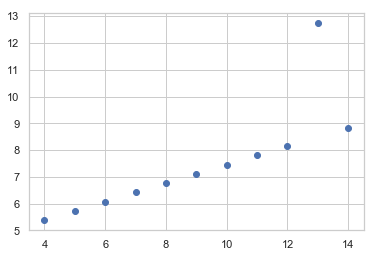

R 0.8162867394895984


In [31]:
# Display the scatter plot of X and Y
plt.scatter(df.x_1, df.y_3)
plt.show()
# Compute and print the correlation
corr  = df['x_1'].corr(df.y_3)
print('R',corr)

In [32]:
# Drop the outlier from the dataset
df = df.drop(2)

# Compute and print the correlation once more
new_corr  = df['x_1'].corr(df.y_3)
print('R',new_corr)

R 0.9999965537848281


## Confidence intervals

- Range of values that we are statistically *confident*, include the *true* (unknown) population value.
- A confidence level represents the frequency we expect the interval to contain the value
- A 95% confidence level means 95 times out of 100 we expect to capture the estimate in the interval

*n= number of samples*

**For Means**:
$$\bar{X}\pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

**For Proportions**:
$$\hat{P}\pm Z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{p}*(1-\hat{p})}{n}}$$


### Sample

- Collection of data from a certain population that is meant to represent the whole
- Make conclusions about the sample to be generalized to understand the broader population

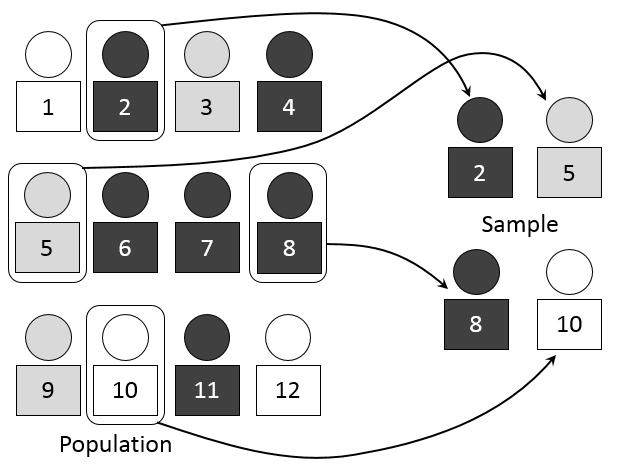

In [33]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG'
Image(url,width=300, height=300)

### Exercise(s):

**Confidence interval by hand**

There are two common ways that interviewers will touch on confidence intervals; they will either ask you to explain it in simple terms, or elaborate on how they are calculated, possibly having you implement one. In this exercise, you'll practice the latter by producing a confidence interval by hand, using no packages other than those imported for you.

We have gone ahead and assigned the appropriate z-score for a 95% confidence interval and sample mean to the z_score and sample_mean variables to simplify things a bit.

In [35]:
from scipy.stats import sem, t

data = np.array([1, 2, 3, 4, 5])
confidence = 0.95
sample_mean = data.mean()
z_score=t.ppf((1 + confidence) / 2., len(data)-1)

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score

# Compute and print the lower threshold
lower = sample_mean - margin_error
print(lower)

# Compute and print the upper threshold
upper = sample_mean + margin_error
print(upper)

1.036756838522439
4.9632431614775605


**Applying confidence intervals**

In practice, you aren't going to hand-code confidence intervals. Let's utilize the statsmodels package to streamline this process and examine some more tendencies of interval estimates.

In this exercise, we've generated a binomial sample of the number of heads in 50 fair coin flips saved as the heads variable. You'll compute a few different confidence intervals for this sample, and then scale your work for 10 similar samples.

The proportion_confint() function has already been imported to help you compute confidence intervals.

In [36]:
from statsmodels.stats.proportion import proportion_confint
heads=27
# Compute and print the 99% confidence interval
confidence_int = proportion_confint(heads, 50, .01)
print(confidence_int)

(0.35844514241179504, 0.721554857588205)


In [37]:
# Compute and print the 90% confidence interval
confidence_int = proportion_confint(heads, 50, .1)
print(confidence_int)

(0.42406406993539053, 0.6559359300646095)


In [38]:
from scipy.stats import binom
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)

(0.48604119788424416, 0.7139588021157558)
(0.44453174400822454, 0.6754682559917756)
(0.5283436332470393, 0.7516563667529608)
(0.36378436885322046, 0.5962156311467796)
(0.44453174400822454, 0.6754682559917756)
(0.42406406993539053, 0.6559359300646095)
(0.36378436885322046, 0.5962156311467796)
(0.48604119788424416, 0.7139588021157558)
(0.3245317440082245, 0.5554682559917755)
(0.30518968814451874, 0.5348103118554812)


## Hypothesis testing

**One tailed z-test**

We know now that hypothesis tests can come in several forms. In this exercise, you'll implement a one tailed z-test on test data from tracking conversion on a mobile app. The data has been imported as results and numpy has already been imported for you along with pandas as well.

The treatment group represents some graphic alteration that we expect to improve the conversion rate of users. Run a test with alpha as .05 and find out if the change actually helped.

In [39]:
results=pd.read_csv('ab_data.csv')
results=results[['group','converted']].sample(n=10000, random_state=1)

In [40]:
# Assign and print the conversion rate for each group
conv_rates = results.groupby(results.group).mean()
print(conv_rates)

           converted
group               
control     0.117542
treatment   0.120475


In [41]:
# Assign the number of conversions and total trials
num_control = results[results['group'] == 'control']['converted'].sum()
total_control = len(results[results['group'] == 'control'])

# Assign the number of conversions and total trials
num_treat = results[results['group'] == 'treatment']['converted'].sum()
total_treat = len(results[results['group'] == 'treatment'])

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('{0:0.3f}'.format(pval))

0.325


**Two tailed t-test**

In this exercise, you'll tackle another type of hypothesis test with the two tailed t-test for means. More concretely, you'll run the test on our laptops dataset from before and try to identify a significant difference in price between Asus and Toshiba.

Once again, we've imported all of the standard packages. Once you get your result, don't forget to make an actionable conclusion.

In [42]:
# Display the mean price for each group
prices = laptops.groupby('Company').mean()
print(prices)

           Unnamed: 0     Inches  Price_euros
Company                                      
Acer        57.818182  15.100000   572.181818
Apple       20.000000  13.714286  1641.662143
Asus        59.941176  15.288235   832.945882
Chuwi       31.000000  15.600000   244.990000
Dell        55.125000  15.266667   980.975000
HP          53.380952  15.471429   657.750000
Lenovo      52.333333  14.633333   500.111111
MSI         67.000000  17.300000  1772.000000
Microsoft   72.000000  13.500000  1089.000000


In [43]:
# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Apple']['Price_euros']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

0.000


## Power and sample size

- Effect size: the amount of the effect you want to detect in a test (i.e. 20% improvement)
- Significance level: The alpha value or the probability rejecting something that is in fact present (type 1 error rate)
- Power: Probability that the test rejects the null hypothesis (H0) when a specific alternative hypothesis (H1) is true. 

### Exercise(s):
Effect on type II error

Which component discussed earlier is the probability of a Type II error related to?
- All of the above

**Calculating sample size**

Let's finish up our dive into statistical tests by performing power analysis to generate needed sample size. Power analysis involves four moving parts:

    Sample size
    Effect size
    Minimum effect
    Power

In this exercise, you're working with a website and want to test for a difference in conversion rate. Before you begin the experiment, you must decide how many samples you'll need per variant using 5% significance and 95% power.

In [44]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=.95)
print(sample_size)

1807.7621477153257


In [45]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=.8)
print(sample_size)

1091.8961587171943


**Visualizing the relationship**

Now that we've gone over the effect on certain errors and calculated the necessary sample size for different power values, let's take a step back and look at the relationship between power and sample size with a useful plot.

In this exercise, we'll switch gears and look at a t-test rather than a z-test. In order to visualize this, use the plot_power() function that shows sample size on the x-axis with power on the y-axis and different lines representing different minimum effect sizes.

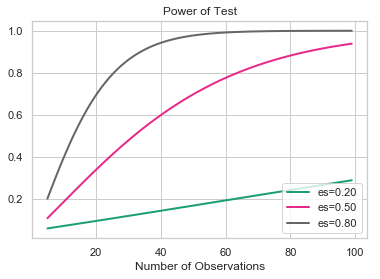

In [46]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

## Multiple Comparisons

- When multiple tests the pvalue needs to be adjusted in order to control the type 1 error rate.

### Common approaches to solving the problem of multiple comparisons 
- **Bonferroni correction**
- Sidak correction
- Step-based procedures
- Tukey's procedure
- Dunnet's correction

*Bonferroni correction: divide pvalue / number of tests*

Note: reduces power

### Exercise(s):

**Calculating error rates**

We talked a bit about the multiple comparisons problem in the slides, but let's take things a step further. In this exercise, you'll look into how the phenomenon affects error rate more precisely.

Your colleague is strongly considering running 60 distinct hypothesis tests. In order to convince them otherwise, compute the probability of a Type I error for 60 hypothesis tests with a single-test 5% significance level.

In [47]:
# Print error rate for 60 tests with 5% significance
error_rate = 1 - (.95**(60))
print(error_rate)

0.953930201013048


In [48]:
# Print error rate for 30 tests with 5% significance
error_rate = 1 - (.95**(30))
print(error_rate)

0.7853612360570628


In [49]:
# Print error rate for 10 tests with 5% significance
error_rate = 1 - (.95**(10))
print(error_rate)

0.4012630607616213


**Bonferroni correction**

Let's implement multiple hypothesis tests using the Bonferroni correction approach that we discussed in the slides. You'll use the imported multipletests() function in order to achieve this.

Use a single-test significance level of .05 and observe how the Bonferroni correction affects our sample list of p-values already created.

In [50]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=0.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


## Regression models

### Exercise(s):

**Linear regression**

In this exercise, you'll implement a simple linear regression model. Get ready to make predictions, visualize the model fit, and analyze the formula used to generate your fit.

By now, you're probably comfortable with the weather dataset that we'll be using. Your dependent variable will be the Humidity3pm feature. All of the standard packages have been imported for you.

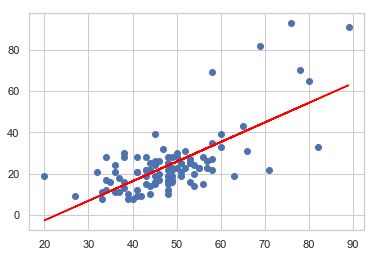

Correlation Coefficient: 0.9479585335141129


In [51]:
from sklearn.linear_model import LinearRegression 
X = np.array(weather['Humidity9am']).reshape(-1,1)
y = weather['Humidity3pm']

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print('Correlation Coefficient:',coef[0])

**Logistic regression**

Let's move on to logistic regression. You'll be working with the same weather dataset again, but the goal here is to predict if it's going to rain tomorrow. We've gone ahead and created your train and test sets for you. Your dependent variables are the Humidity9am and Humidity3pm features.

It's also worth noting that the dataset has already been normalized in order to ensure that we can interpret the coefficients later on. This is always good to bring up during your interview when talking about regression for inference.

In [52]:
weather=weather[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow','Humidity9am','Humidity3pm']]
X=weather[['Humidity9am','Humidity3pm']]
y=weather[['RainTomorrow']]

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#X=preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and fit your model
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())


# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print(acc)

# Assign and print the coefficents
coefs = clf.coef_
print(coefs)

0.9696969696969697
[[-0.06815201  0.08015784]]


## Evaluating Models

- R-squared

- Mean Absolute Error (MAE)

- Mean Sauared Error (MSE)

*Residuals*

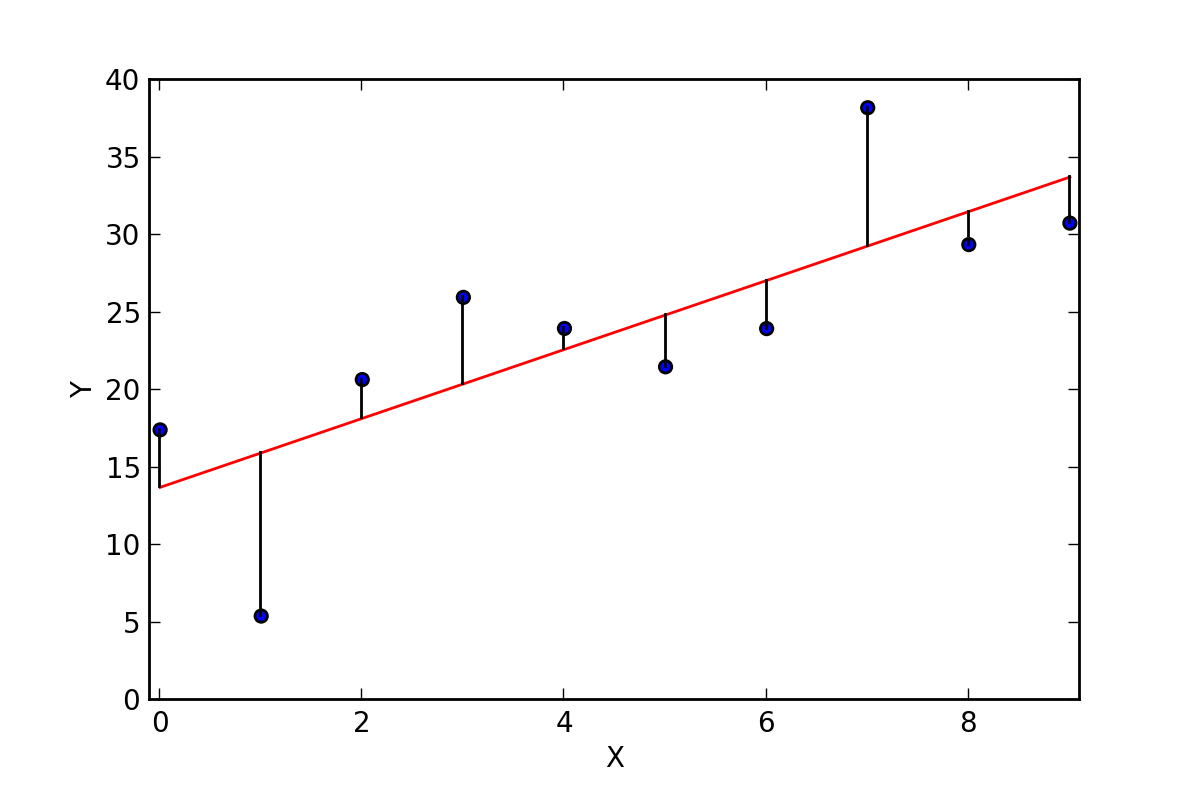

In [56]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png'
Image(url,width=500, height=300)


***MAE vs MSE***

- **MAE**: sum of absolute residuals over the number of points 
- **MSE**: sum of the residuals squared over the number of points

<img src='maeVmse.jpg' width="300" height="100" align="center">

*Typically: MSE is better in situations when your data contains outliers since by squaring the errors they are weighted more heavily. However, if you aren't as concerneed with outliers or singular observations MAE can be used to supress those observations a bit more since it involves taking the absolute values instead of squaring the errors.*


### Classification Techniques of Evaluation

<img src='type1type2.jpg' width="300" height="100" align="center">

- Precision
- Recall 
- Confusion Matrices

https://en.wikipedia.org/wiki/Confusion_matrix

<img src='confusion1.png' width="300" height="100" align="left">



**condition positive (P)**

the number of real positive cases in the data

**condition negative (N)**

the number of real negative cases in the data

**true positive (TP)**

eqv. with hit

**true negative (TN)**

eqv. with correct rejection

**false positive (FP)**

eqv. with false alarm, Type I error

**false negative (FN)**

eqv. with miss, Type II error



https://en.wikipedia.org/wiki/Sensitivity_and_specificity

<img src='sensitivity-specificity-noted.jpg' width="300" height="100" align="center">

**Sensitivity, recall, hit rate, or true positive rate (TPR)**
- Measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
- Linked to the rate of type 2 errors 

In [59]:
Math(r'TPR = \frac{TP}    {TP+FN}=\frac{TP}    {P}=1-FNR_{False Negative Rate} ')

<IPython.core.display.Math object>

**Specificity, selectivity or true negative rate (TNR)**
- Measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

In [66]:
Math(r'TNR = \frac{TN}    {N}=\frac{TN}    {TN+FP}=1-FNR_{False Negative Rate} ')

<IPython.core.display.Math object>

**Precision or positive predictive value (PPV)**
- Percentage of observations correctly guessed  
- Linked to rate of type 1 error

In [62]:
Math(r'PPV = \frac{TP}    {TP+FP}')

<IPython.core.display.Math object>

**Negative predictive value (NPV)**


In [64]:
Math(r'NPV = \frac{TN}    {TN+FN}')

<IPython.core.display.Math object>



**Miss rate or false negative rate (FNR)**


In [65]:
Math(r'FNR = \frac{FN}    {P}=\frac{FN}    {FN+TP}=1-FPR_{False Positive Rate} ')

<IPython.core.display.Math object>

**Fall-out or false positive rate (FPR)**


In [68]:
Math(r'FPR = \frac{FP}    {N}=\frac{FP}    {FP+TN}=1-TNR')

<IPython.core.display.Math object>

**False discovery rate (FDR)**

In [69]:
Math(r'FDR = \frac{FP}    {FP+TP}=1-PPV_{+}')

<IPython.core.display.Math object>



**False omission rate (FOR)**


In [70]:
Math(r'FOR = \frac{FN}    {FN+TN}=1-NPV_{-}')

<IPython.core.display.Math object>

**Accuracy (ACC)**


In [71]:
Math(r'ACC = \frac{TP+TN}    {P+N}=\frac{TP+TM}    {TP+TN+FP+FN} ')

<IPython.core.display.Math object>



**F1 Score**

In [73]:
Math(r'F_{1} = 2*\frac{PPV*TPR}    {PPV+TPR}=\frac{2TP}    {2TP+FP+FN} ')

<IPython.core.display.Math object>

<img src='confusionMatrix.png' width="1000" height="100" align="center">

**Regression evaluation**

Let's revisit the linear regression model that you created with LinearRegression() and then trained with the fit() function a few exercises ago. Evaluate the performance your model, imported here as lm for you to call.

The weather data has been imported for you with the X and y variables as well, just like before. Let's get to calculating the R-squared, mean squared error, and mean absolute error values for the model.

In [83]:
weather=pd.read_csv('weatherAUS.csv')[:100]

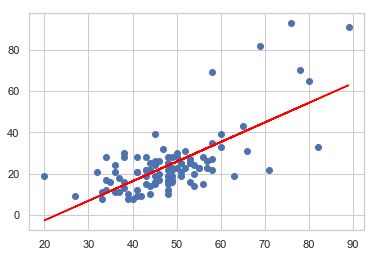

Correlation Coefficient: 0.9479585335141129
R-squared score: 0.48730975172295865
Means Squared Error: 125.2348469466329
Means Absolute Error: 8.050800250030953


In [82]:
weather=pd.read_csv('weatherAUS.csv')[:100]
from sklearn.linear_model import LinearRegression 
X = np.array(weather['Humidity9am']).reshape(-1,1)
y = weather['Humidity3pm']

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print('Correlation Coefficient:',coef[0])

# R-squared score
r2 = lm.score(X,y)
print('R-squared score:',r2)

from sklearn.metrics import mean_squared_error, mean_absolute_error
preds = lm.predict(X)
# Mean squared error
mse = mean_squared_error(y, preds)
# Mean absolute error
mae = mean_absolute_error(y, preds)
print('Means Squared Error:',mse)
print('Means Absolute Error:',mae)

**Classification evaluation**

Moving forward with evaluation metrics, this time you'll evaluate our logistic regression model from before with the goal of predicting the binary RainTomorrow feature using humidity.

We have gone ahead and imported the model as clf and the same test sets assigned to the X_test and y_test variables. Generate and analyze the confusion matrix and then compute both precision and recall before making a conclusion.

In [84]:
weather=weather[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow','Humidity9am','Humidity3pm']]
X=weather[['Humidity9am','Humidity3pm']]
y=weather[['RainTomorrow']]

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#X=preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and fit your model
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())


# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print('Accuracy:',acc)

# Assign and print the coefficents
coefs = clf.coef_
print('Coefficients:',coefs)

# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
precision = precision_score(y_test, preds,pos_label="Yes")
recall = recall_score(y_test, preds,pos_label="Yes")
print('Confusion Matrix:\n',matrix)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',2*((precision*recall)/(precision+recall)))

Accuracy: 0.9696969696969697
Coefficients: [[-0.06815201  0.08015784]]
Confusion Matrix:
 [[28  0]
 [ 1  4]]
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


## Bias-variance tradeoff

<img src='bias_precision.png' width="300" height="100" align="left">

<img src='bias_variance.png' width="300" height="100" align="left">

**Types of error**: 
- Bias
    - Simplifying the assumptions of the model to make the target function easier to learn
    - Faster to learn and easier to understand
    - Typically more robust in nature and generalize well
    - Can lead to underfitting, model not representing the data well
        - Selection Bias
        - Confounding
        - Information Bias
    - *Machine Learning ex: Linear Regression, Logistic Regression, Linear discriminant analysis (LDA)*
- Variance
    - Amount the target function would change if different training data was used.
    - Too much variance would lead to the problem of overfitting
    - Too flexible and sensitive
    - Won't generalize well to unseen data
    - *Machine Learning ex: Decision Trees, Neural Networks, K-Nearest Neighbors, Support Vector Machines (SVM)*
- Irreducible error
    - multiple sources of error

### The Goal

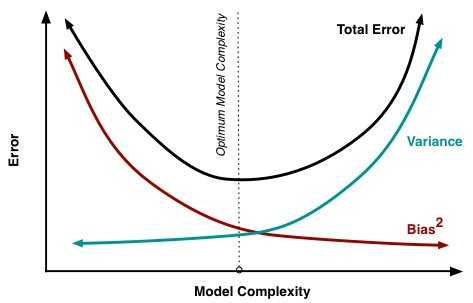

In [126]:
from IPython.display import Image
url = 'https://www.kdnuggets.com/wp-content/uploads/bias-variance-total-error.jpg'
Image(url,width=500, height=300)


*Assessing Fit from Machine Learning Training History Plot*

<img src='training_error.png' width="400" height="100" align="left">

### Exercise(s):

In terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?
- Variance

**Visualizing the tradeoff**

We know that the bias-variance tradeoff serves as the basis for dealing with issues like overfitting and underfitting in machine learning.

In this final exercise, you'll revisit our weather dataset one last time by visualizing the difference between high bias and high variance models using the already imported preds and preds2 variables.

As a reminder, we are using the Temp9am feature to predict our dependent variable, the Temp3pm feature. The usual packages have been imported.

In [153]:
X=np.array([ 8.6, 14.2, 15.1, 17.5, 16.2,  5.8, 20.3,  2.5, 15.4, 22.2, 30.4,
       11. , 21.7, 25.5, 13.4, 25.2, 10.6, 26.7, 20.5])
y=np.array([11.5, 17. , 22.5, 24.3, 27.4, 18.8, 32. ,  8.6, 30.9, 30.7, 29.3,
       17.8, 25.6, 33.9, 19.2, 25.3, 15. , 21.7, 23.1])

In [158]:
preds=np.array([12.45724842, 14.82960776, 16.8425187 , 18.28031224, 18.56787094,
       20.29322318, 20.8683406 , 21.51534769, 21.73101672, 22.30613413,
       23.24069993, 25.25361088, 25.39739023, 26.26006635, 26.61951473,
       28.77620503, 28.99187406, 29.85455018, 32.51446822])
preds2=np.array([15.53525198, 15.53535007, 15.55148727, 15.72947367, 15.82907881,
       17.73831971, 19.20364488, 21.48164064, 22.37381012, 24.95533779,
       28.91800569, 28.68313159, 28.23278614, 26.59000134, 27.16358784,
       31.52912842, 28.1403767 , 22.11067348, 29.29891384])

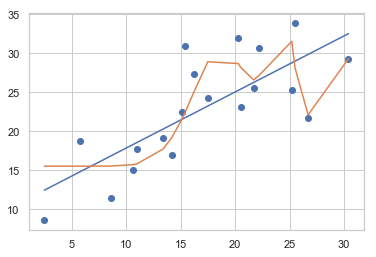

In [160]:
# Use X and y to create a scatterplot
plt.scatter(X, y)

# Add your model predictions to the scatter plot 
plt.plot(np.sort(X), preds)

# Add the higher-complexity model predictions as well
plt.plot(np.sort(X), preds2)
plt.show()

## Advice

- Simulate the interview environment
- Practice explaining big concepts
- Know the business / product well
- Come prepared with ideas

**Resources:**
- Data Science Career Resources Repo
- Practical Statistics for Data Scientists
- 120 Data Science Interview Questions
- Advice Applying to Data Science Jobs
